# Train/Valid/Test 데이터 셋 나누기

머신러닝은 주어진 데이터 셋에서 독립변수와 종속변수의 상관관계를 잘 나타낼 수 있는 모델을 학습을 통해서 생성하는 작업입니다. 따라서, 데이터 셋은 머신러닝에서 매우 중요한 요소이며, "Garbage In, Garbage Out" 이라는 말로 대표되고 있습니다.

머신러닝에서 학습을 위한 데이터 셋을 준비하는데 중요한 것은 

* 준비한 전체 학습 데이터 셋이 모집단을 대표할 수 있어야 하며
* 분리한 Train/Test 셋 사이에 데이터 오염이 없어야 하고
* 분리된 Train/Test 셋 또한 모집단을 대표할 수 있어야 한다.

입니다. 데이터 셋이 모집단을 대표할 수 있어야 한다는 가정은 큰 수 이상의 랜덤 샘플을 통해 해결이 가능하지만, 데이터의 도메인에 따라 무작정 랜덤 샘플을 할수 없는 경우에는 도메인에 맞는 샘플링 방법을 통해 데이터를 확보해야 합니다. (예를 들어 시계열 데이터의 경우는 데이터 오염을 없애기 위해 시간 범위로 학습 데이터를 분리합니다.) 정해진 Train과 Test를 나누는 비율을 없지만, 보통 7:3, 8:2 정도의 비율을 통해 학습 데이터를 분리합니다. 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터 생성
np.random.seed(0)
n_samples = 10
np_data_xs, np_data_ys = datasets.make_classification(n_samples=n_samples)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))

# 8:2 비율로 랜덤 샘플하여 Train/Test 셋 분리
np_train_xs, np_test_xs, np_train_ys, np_test_ys = model_selection.train_test_split(
    np_data_xs, np_data_ys, 
    test_size=0.3, shuffle=True, random_state=2)
print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

data shape: np_data_xs=(10, 20), np_data_ys=(10,)
train shape: np_train_xs=(7, 20), np_train_ys=(7,)
test shape: np_test_xs=(3, 20), np_test_ys=(3,)


# Overfitting

모델은 학습을 통해 Train 데이터 셋을 잘 설명할 수 있는 최적화를 하게 됩니다. 하지만, 과도한 최적화는 새로운 데이터에 대한 적응성을 떨어 트리게 되어, 모델이 실제 배포 된 후, 오히려 제대로 된 성능을 내지 못하게 됩니다.

Underfit(과소적합) 상태는 모델이 데이터 셋을 잘 설명하지 못하는 상태이며, Overfit(과적합) 상태는 모델이 너무 학습 데이터에 최적화되어 새로운 데이터에 대한 적응성이 떨어지는 상태 입니다.

![overfitting](https://cdn-images-1.medium.com/max/1600/1*tBErXYVvTw2jSUYK7thU2A.png)

Underfit은 모델 변경, 파라미터 최적화, Regularization(정규화) 제약을 줄이는 방향으로 해결 가능하며, Overfit의 경우에는 Early Stop 정책을 통한 학습 제한 및 정규화 제약을 높이는 방향으로 해결 가능합니다.

# Cross Validation(교차검증)

머신러닝 학습 과정에서 과적합을 방지하기 위해 Train 셋을 다시 Train/Valid 셋을 나누고, Valid 셋을 이용하여 학습 중 평가를 진행 하면서 학습이 잘 진행되고 있는지, 그리고 과적합이 일어나지 않는지 체크하고 과적합 전에 일찍 학습을 종료하는 Early Stop 정책을 사용하는 경우가 많습니다. Train 셋이 충분하다면 Test 셋을 나누었던 비율과 비슷한 7:3, 8:2 비율로 나누어 진행하면 되지만, Train 셋이 충분하지 않을 경우, Valid 셋은 학습하는데 누락 될 수 밖에 없게됩니다.

이런 문제를 방지하기 위해서, Valid 셋을 누락 시키지 않고, 학습하기 위한 여러 교차 검증 방법이 존재 합니다.

## K-Fold

K-fold 방법은 교차검증 방법 중에서 가장 일반적으로 사용되는 방법입니다. Train 셋을 K 개의 그룹으로 나누고 1개는 Valid 셋이 되고 나머지는 Train 셋으로 하여 모델을 반복 학습 시키는 방법입니다. Repeated K-fold 방식은 다른 랜덤 인덱스로 K-fold 를 반복하는 방법입니다. K-fold 방법은 그룹내 Class 의 균형에 대한 고려가 없이 나누는 방법이기 때문에 그룹안에 학습 데이터의 Class 가 불균형하게 들어갈 수 있습니다.

![K-Fold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0041.png)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터 생성
np.random.seed(0)
n_samples = 10
np_data_xs, np_data_ys = datasets.make_classification(n_samples=n_samples, n_features=5, n_classes=2)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))

# Cross Validation Methods
cvs = [
    model_selection.KFold(n_splits=2),
    model_selection.RepeatedKFold(n_splits=2, n_repeats=2)
]

for cv in cvs:
    print("\nCross Valid: {}".format(cv))
    for idx_train, idx_valid in cv.split(np_data_xs):
        print("idx_train: {}, idx_test: {}".format(idx_train, idx_valid))
        np_train_xs, np_train_ys = np_data_xs[idx_train], np_data_ys[idx_train]
        np_test_xs, np_test_ys = np_data_xs[idx_valid], np_data_ys[idx_valid]
        print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
        print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

data shape: np_data_xs=(10, 5), np_data_ys=(10,)

Cross Valid: KFold(n_splits=2, random_state=None, shuffle=False)
idx_train: [5 6 7 8 9], idx_test: [0 1 2 3 4]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [0 1 2 3 4], idx_test: [5 6 7 8 9]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)

Cross Valid: RepeatedKFold(n_repeats=2, n_splits=2, random_state=None)
idx_train: [0 2 3 7 8], idx_test: [1 4 5 6 9]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [1 4 5 6 9], idx_test: [0 2 3 7 8]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [2 3 6 8 9], idx_test: [0 1 4 5 7]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [0 1 4 5 7], idx_test: [2 3 6 8 9]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
te

## Stratified K-Fold

Stratified K-Fold 방식은 K-Fold 와 달리 Valid 셋을 분리 할 때, Class 의 비율대로 균등하게 Valid 셋을 분리합니다.

![Stratified k-fold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0071.png)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터 생성
np.random.seed(0)
n_samples = 10
np_data_xs, np_data_ys = datasets.make_classification(n_samples=n_samples, n_features=5, n_classes=2)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))

# Cross Validation Methods
cvs = [
    model_selection.StratifiedKFold(n_splits=2),
    model_selection.RepeatedStratifiedKFold(n_splits=2, n_repeats=2)
]

for cv in cvs:
    print("\nCross Valid: {}".format(cv))
    for idx_train, idx_valid in cv.split(np_data_xs, np_data_ys):
        print("idx_train: {}, idx_test: {}".format(idx_train, idx_valid))
        np_train_xs, np_train_ys = np_data_xs[idx_train], np_data_ys[idx_train]
        np_test_xs, np_test_ys = np_data_xs[idx_valid], np_data_ys[idx_valid]
        print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
        print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

data shape: np_data_xs=(10, 5), np_data_ys=(10,)

Cross Valid: StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
idx_train: [5 6 7 8 9], idx_test: [0 1 2 3 4]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [0 1 2 3 4], idx_test: [5 6 7 8 9]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)

Cross Valid: RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=None)
idx_train: [0 3 5 7 8], idx_test: [1 2 4 6 9]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [1 2 4 6 9], idx_test: [0 3 5 7 8]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [3 5 6 7 8], idx_test: [0 1 2 4 9]
train shape: np_train_xs=(5, 5), np_train_ys=(5,)
test shape: np_test_xs=(5, 5), np_test_ys=(5,)
idx_train: [0 1 2 4 9], idx_test: [3 5 6 7 8]
train shape: np_train_xs=(5, 5),

## Group K-Fold

Group K-Fold 방식은 Valid 셋을 나눌때 사용자가 정의해준 Group 이 겹치치 않도록 Valid 셋을 분리하는 방식입니다.

![Group K-Fold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0051.png)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터 생성
np.random.seed(0)
n_samples = 10
np_data_xs, np_data_ys = datasets.make_classification(n_samples=n_samples, n_features=5, n_classes=2)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
data_group = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# Cross Validation Methods
cvs = [
    model_selection.GroupKFold(n_splits=3)
]

for cv in cvs:
    print("\nCross Valid: {}".format(cv))
    for idx_train, idx_valid in cv.split(np_data_xs, np_data_ys, groups=data_group):
        print("idx_train: {}, idx_test: {}".format(idx_train, idx_valid))
        np_train_xs, np_train_ys = np_data_xs[idx_train], np_data_ys[idx_train]
        np_test_xs, np_test_ys = np_data_xs[idx_valid], np_data_ys[idx_valid]
        print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
        print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

data shape: np_data_xs=(10, 5), np_data_ys=(10,)

Cross Valid: GroupKFold(n_splits=3)
idx_train: [0 1 2 3 4 5], idx_test: [6 7 8 9]
train shape: np_train_xs=(6, 5), np_train_ys=(6,)
test shape: np_test_xs=(4, 5), np_test_ys=(4,)
idx_train: [0 1 2 6 7 8 9], idx_test: [3 4 5]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)
idx_train: [3 4 5 6 7 8 9], idx_test: [0 1 2]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)


## ShuffleSplit

ShuffleSplit은 K-Fold 방법은 훌륭한 대안이 될 수 있습니다. Class 또는 Group 에 상관없이 주어진 사이즈 만큼 랜덤하게 Valid 셋을 분리합니다. 

![ShuffleSplit](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0061.png)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터 생성
np.random.seed(0)
n_samples = 10
np_data_xs, np_data_ys = datasets.make_classification(n_samples=n_samples, n_features=5, n_classes=2)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))

# Cross Validation Methods
cvs = [
    model_selection.ShuffleSplit(n_splits=3, test_size=0.25)
]

for cv in cvs:
    print("\nCross Valid: {}".format(cv))
    for idx_train, idx_valid in cv.split(np_data_xs):
        print("idx_train: {}, idx_test: {}".format(idx_train, idx_valid))
        np_train_xs, np_train_ys = np_data_xs[idx_train], np_data_ys[idx_train]
        np_test_xs, np_test_ys = np_data_xs[idx_valid], np_data_ys[idx_valid]
        print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
        print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

data shape: np_data_xs=(10, 5), np_data_ys=(10,)

Cross Valid: ShuffleSplit(n_splits=3, random_state=None, test_size=0.25, train_size=None)
idx_train: [1 6 7 8 3 2 0], idx_test: [5 9 4]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)
idx_train: [1 4 8 6 2 9 3], idx_test: [0 5 7]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)
idx_train: [5 0 3 2 4 1 9], idx_test: [7 8 6]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)


## Stratified Shuffle Split

Class의 비율로 주어진 사이즈대로 랜덤하게 Valid 셋을 분리합니다.

![Stratified Shuffle Split](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0091.png)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터 생성
np.random.seed(0)
n_samples = 10
np_data_xs, np_data_ys = datasets.make_classification(n_samples=n_samples, n_features=5, n_classes=2)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))

# Cross Validation Methods
cvs = [
    model_selection.StratifiedShuffleSplit(n_splits=2, test_size=0.25)
]

for cv in cvs:
    print("\nCross Valid: {}".format(cv))
    for idx_train, idx_valid in cv.split(np_data_xs, np_data_ys):
        print("idx_train: {}, idx_test: {}".format(idx_train, idx_valid))
        np_train_xs, np_train_ys = np_data_xs[idx_train], np_data_ys[idx_train]
        np_test_xs, np_test_ys = np_data_xs[idx_valid], np_data_ys[idx_valid]
        print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
        print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

data shape: np_data_xs=(10, 5), np_data_ys=(10,)

Cross Valid: StratifiedShuffleSplit(n_splits=2, random_state=None, test_size=0.25,
            train_size=None)
idx_train: [1 9 8 2 4 3 6], idx_test: [5 7 0]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)
idx_train: [0 7 5 1 2 9 8], idx_test: [6 3 4]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)


## Group Shuffle Split¶

Group의 비율로 주어진 사이즈대로 랜덤하게 Valid 셋을 분리합니다.

![Group Shuffle Split¶](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0081.png)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터 생성
np.random.seed(0)
n_samples = 10
np_data_xs, np_data_ys = datasets.make_classification(n_samples=n_samples, n_features=5, n_classes=2)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
data_group = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# Cross Validation Methods
cvs = [
    model_selection.GroupShuffleSplit(n_splits=3, test_size=0.25)
]

for cv in cvs:
    print("\nCross Valid: {}".format(cv))
    for idx_train, idx_valid in cv.split(np_data_xs, np_data_ys, groups=data_group):
        print("idx_train: {}, idx_test: {}".format(idx_train, idx_valid))
        np_train_xs, np_train_ys = np_data_xs[idx_train], np_data_ys[idx_train]
        np_test_xs, np_test_ys = np_data_xs[idx_valid], np_data_ys[idx_valid]
        print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
        print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

data shape: np_data_xs=(10, 5), np_data_ys=(10,)

Cross Valid: GroupShuffleSplit(n_splits=3, random_state=None, test_size=0.25,
         train_size=None)
idx_train: [0 1 2 6 7 8 9], idx_test: [3 4 5]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)
idx_train: [3 4 5 6 7 8 9], idx_test: [0 1 2]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)
idx_train: [3 4 5 6 7 8 9], idx_test: [0 1 2]
train shape: np_train_xs=(7, 5), np_train_ys=(7,)
test shape: np_test_xs=(3, 5), np_test_ys=(3,)


# Cross Validation Score

교차 검증을 위해 데이터 셋을 나누는 함수외에 학습과 평가를 한번에 진행 할 수 있는 함수를 제공합니다. 평가를 위해 제공되는 Scoring 함수는 아래 링크에서 확인 할 수 있습니다.

* https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

sklearn.metrics 에서 제공되는 함수들은

* _score 로 끝나는 함수들은 높은 값이 좋은 것입니다.
* _error or _loss 로 끝나는 함수들은 낮은 값이 좋은 것입니다. (make_scorer 사용시 bigger_is_better = False로 설정하세요, 기본 값은 True입니다.)

## Evaluation
  * [Regressioin](https://comafire.github.io/pages/ml-eval-regression)
  * [Classification](https://comafire.github.io/pages/ml-eval-classification)

## Regression

평가 함수를 사용할 때 주의할 점은 Cross Validation Score는 높은 값이 좋은 것으로 설계되어 있습니다. Regression 의 에러 함수는 평가 함수의 Nagative 값을 넣어주어야 제대로 동작합니다. 그리고, 스코어 값을 다시 에러 함수로 평가할때는 본연의 의미대로 바꾸기 위해 다시 '-' 를 붙여 환원합니다.


data shape: np_data_xs=(1000, 1), np_data_ys=(1000,)


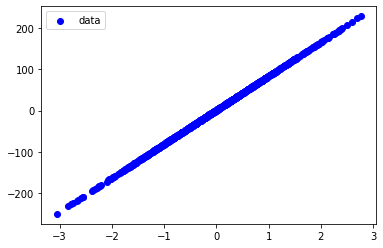

RMSE Scores: [0.26905519 0.31966832 0.30856823 0.30335398 0.28833385], Mean: 0.2977959123991094, STD: 0.017555038647570402


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터
np.random.seed(0)
n_samples = 1000
np_data_xs, np_data_ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=0) # 난수 발생용 Seed 값
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
plt.scatter(np_data_xs, np_data_ys, label='data', c='b')
plt.legend()
plt.show()

model = linear_model.LinearRegression()
scores = model_selection.cross_val_score(model, np_data_xs, np_data_ys, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE Scores: {}, Mean: {}, STD: {}".format(rmse_scores, rmse_scores.mean(), rmse_scores.std()))


## Classification

멀티 클래스의 경우 f1_score 계산시 학습 데이터를 고려하여 'macro', 'wegithed', 'micro', 'samples' 옵션으로 구할 수 있습니다.([Classification](https://comafire.github.io/pages/ml-eval-classification))  

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import xgboost as xgb
from sklearn import datasets, model_selection, ensemble, metrics

# 데이터
np.random.seed(0)
n_samples = 10000
np_data_xs, np_data_ys = datasets.make_classification(
    n_samples=n_samples, # 데이터 수
    n_features=10, # X feature 수
    n_informative=3,
    n_classes=3, # Y class 수
    random_state=0) # 난수 발생용 Seed 값
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))

# 모델
model = ensemble.RandomForestClassifier()
scores = model_selection.cross_val_score(model, np_data_xs, np_data_ys, cv=5, scoring='f1_macro')
f1_scores = scores
print("F1 Scores: {}, Mean: {}, STD: {}".format(f1_scores, f1_scores.mean(), f1_scores.std()))
    

data shape: np_data_xs=(10000, 10), np_data_ys=(10000,)
F1 Scores: [0.95437945 0.94533971 0.94797739 0.9457868  0.94338936], Mean: 0.9473745411748016, STD: 0.0037940848016819236
